In [78]:
import numpy as np
import glob
import pandas as pd
from scipy.fft import fft, ifft
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy.stats import sem

FONTSIZE = 18

In [79]:
def calc_shear(slope, T):
    # slope = eta*6*pi / (kT zeta)
    eta = slope/(6*np.pi)*T*2.837
    return -eta

In [87]:
sizes = (5.11450303471297, 8.11876749759792, 8.59182671091478, 10.2290060694259)
d_msd = (
    (0.04166216709054683, 0.001671750922517653),
    (0.04703816440178566, 0.0019457605788874128),
    (0.04752283526016345, 0.0007129436011614512),
    (0.0483887111029086, 0.0013251789593872836)
)
sizes = np.array(sizes)
d_msd = np.array(d_msd)


print(np.round(d_msd, 3))


linfit = linregress(1./sizes, d_msd[:,0])


[[0.042 0.002]
 [0.047 0.002]
 [0.048 0.001]
 [0.048 0.001]]


In [90]:
sizes = (5.11450303471297, 6.44387003318608, 8.11876749759792, 8.59182671091478, 10.2290060694259)
d_msd = (
    (0.04166216709054683, 0.001671750922517653),
    (0.04956426468504528, 0.0012063717278226731),
    (0.04703816440178566, 0.0019457605788874128),
    (0.04752283526016345, 0.0007129436011614512),
    (0.0483887111029086, 0.0013251789593872836)
)




d_vacf = (
    (0.027454500734484143, 0.00018328051509304086
),
    (0.029216714575869836, 7.917605281514499e-05
),
(0.02935951266233585, 0.0002228040169429993
),
(0.029612912503111665, 7.075075337398072e-05
),
(0.029729238263399165, 0.0001562037626438594
)

)
sizes = np.array(sizes)
d_msd = np.array(d_msd)
d_vacf = np.array(d_vacf)

print(np.round(d_vacf, 4))

[[0.0275 0.0002]
 [0.0292 0.0001]
 [0.0294 0.0002]
 [0.0296 0.0001]
 [0.0297 0.0002]]


0.0555837352829028
0.008346273797766843
0.021446930952258192
0.0017682061591982674


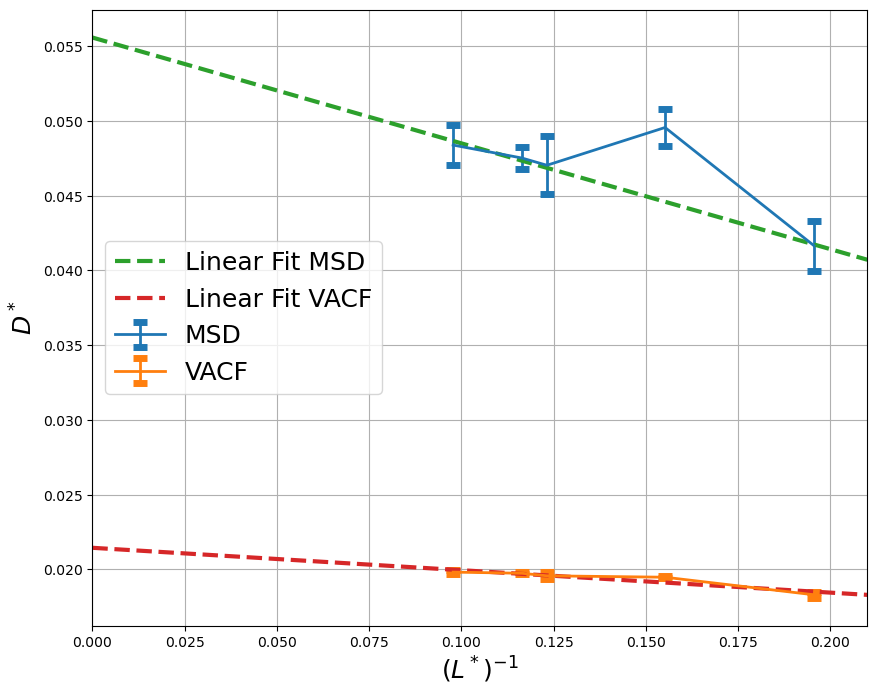

In [82]:
fig, ax = plt.subplots(1,1, figsize=(10,8))


T = 0.7833
x = np.linspace(0,0.21)

plt.errorbar(1./sizes, d_msd[:,0], yerr=d_msd[:,1], label='MSD', capsize=5, capthick=5, markersize=0.2, marker='', ls='solid', lw=2)
plt.errorbar(1./sizes, d_vacf[:,0]*2./3., yerr=d_vacf[:,1], label='VACF', capsize=5, capthick=5, markersize=0.2, marker='', ls='solid', lw=2)

print(linfit[1])
print(calc_shear(linfit[0], T))

plt.plot(x,linfit[0]*x+linfit[1], linewidth=3, label='Linear Fit MSD', ls='dashed')
linfit = linregress(1./sizes, d_vacf[:,0]*2./3.)
plt.plot(x,linfit[0]*x+linfit[1], linewidth=3, label='Linear Fit VACF', ls='dashed')
print(linfit[1])

print(calc_shear(linfit[0], T))


ax.set_xlim(0,0.21)
ax.set_xlabel(r"$(L^*)^{-1}$", fontsize=FONTSIZE)
ax.set_ylabel(r"$D^*$", fontsize=FONTSIZE)
ax.legend(fontsize=FONTSIZE)
ax.grid()


# MSD: 2.976 cm^2/s
# VACF: 1.148 cm^2/sec

plt.savefig('diffcofcalc.png', dpi=300)

[[1.500053e+00 3.180000e-04]
 [1.500015e+00 1.250000e-04]
 [1.500004e+00 1.080000e-04]
 [1.500003e+00 2.500000e-05]]


<ErrorbarContainer object of 3 artists>

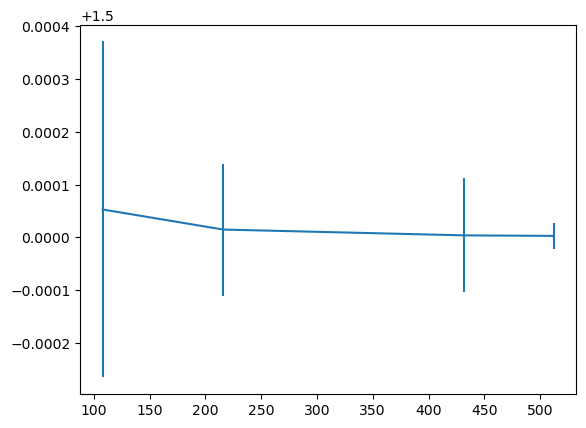

In [83]:
n = (108, 216, 432, 512)
cv = ((np.float64(1.500052730874745), np.float64(0.00031755546177425774)),
      (np.float64(1.500015386976049), np.float64(0.00012468932323312694)),
      (np.float64(1.5000037261817238), np.float64(0.00010844779345814652)),
      (np.float64(1.500002680521904), np.float64(2.4708221902614042e-05))
)

n = np.array(n)
cv = np.array(cv)

cv = np.round(cv, 6)
print(cv)

plt.errorbar(n, cv[:,0], yerr=cv[:,1])